In [66]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import netCDF4 as nc
import datetime as dt
import matplotlib.pyplot as plt
import spacepy.pybats.kyoto as kt

In [12]:
"""
    We are looking at solar wind and space weather indices from Feb 1 - Feb 8, 2022.
    Following solar wind values are from the DSCOVR satellite (https://www.ngdc.noaa.gov/dscovr/next/).
    Kp, AE and Sym-H observations fetched from Kyoto Observatory.

"""
# Set up inputs here
starttime = dt.datetime(2022, 2, 1, 0, 0, 0)
stoptime  = dt.datetime(2022, 2, 8, 23, 59, 59)

key = ['Feb01', 'Feb02', 'Feb03', 'Feb04', 'Feb05', 'Feb06', 'Feb07', 'Feb08']

m1m_files = {key[0]:'oe_m1m_dscovr_s20220201000000_e20220201235959_p20220202021626_pub.nc.gz',
             key[1]:'oe_m1m_dscovr_s20220202000000_e20220202235959_p20220203021731_pub.nc.gz',
             key[2]:'oe_m1m_dscovr_s20220203000000_e20220203235959_p20220204021701_pub.nc.gz',
             key[3]:'oe_m1m_dscovr_s20220204000000_e20220204235959_p20220205021730_pub.nc.gz',
             key[4]:'oe_m1m_dscovr_s20220205000000_e20220205235959_p20220206021727_pub.nc.gz',
             key[5]:'oe_m1m_dscovr_s20220206000000_e20220206235959_p20220207021739_pub.nc.gz',
             key[6]:'oe_m1m_dscovr_s20220207000000_e20220207235959_p20220208021631_pub.nc.gz',
             key[7]:'oe_m1m_dscovr_s20220208000000_e20220208235959_p20220209021604_pub.nc.gz'}

f1m_files = {key[0]:'oe_f1m_dscovr_s20220201000000_e20220201235959_p20220202022134_pub.nc.gz',
             key[1]:'oe_f1m_dscovr_s20220202000000_e20220202235959_p20220203022239_pub.nc.gz',
             key[2]:'oe_f1m_dscovr_s20220203000000_e20220203235959_p20220204022204_pub.nc.gz',
             key[3]:'oe_f1m_dscovr_s20220204000000_e20220204235959_p20220205022237_pub.nc.gz',
             key[4]:'oe_f1m_dscovr_s20220205000000_e20220205235959_p20220206022231_pub.nc.gz',
             key[5]:'oe_f1m_dscovr_s20220206000000_e20220206235959_p20220207022239_pub.nc.gz',
             key[6]:'oe_f1m_dscovr_s20220207000000_e20220207235959_p20220208022120_pub.nc.gz',
             key[7]:'oe_f1m_dscovr_s20220208000000_e20220208235959_p20220209022058_pub.nc.gz'}

In [52]:
# Set up a dictionary to store variables
data = {}
key_data = ['time', 'bx', 'by', 'bz', 'vx', 'vy', 'vz', 'rho', 'temp']

for kd in key_data:
    data[kd] = []

# Extract all data from gun-zipped files here.
for k in key:
    os.system('gzip -d {:}'.format(m1m_files[k]))
    filem1m = m1m_files[k][:-3]; ds_m1m = nc.Dataset(filem1m)
    os.system('gzip -d {:}'.format(f1m_files[k]))
    filef1m = f1m_files[k][:-3]; ds_f1m = nc.Dataset(filef1m)
    
    for i in range(len(ds_m1m.variables['time'])):
        t_since = ds_m1m.variables['time'][i].compressed()[:]
        t_since = dt.datetime(1970, 1, 1, 0, 0, 0, 0) + dt.timedelta(milliseconds=t_since[0])
        data['time'].append(t_since)

        bx_gsm_dscovr = ds_m1m.variables['bx_gsm'][i].compressed()[:] 
        if bx_gsm_dscovr.size > 0: 
            data['bx'].append(bx_gsm_dscovr[0])
        else: data['bx'].append(np.nan)#-99999.)
            
        by_gsm_dscovr = ds_m1m.variables['by_gsm'][i].compressed()[:]
        if by_gsm_dscovr.size > 0: 
            data['by'].append(by_gsm_dscovr[0])
        else: data['by'].append(np.nan)#-99999.)
            
        bz_gsm_dscovr = ds_m1m.variables['bz_gsm'][i].compressed()[:]
        if bz_gsm_dscovr.size > 0: 
            data['bz'].append(bz_gsm_dscovr[0])
        else: data['bz'].append(np.nan)#-99999.)
        
        vx_gsm_dscovr = ds_f1m.variables['proton_vx_gsm'][i].compressed()[:]
        if vx_gsm_dscovr.size > 0: 
            data['vx'].append(vx_gsm_dscovr[0])
        else: data['vx'].append(np.nan)#-99999.)
        
        vy_gsm_dscovr = ds_f1m.variables['proton_vy_gsm'][i].compressed()[:]
        if vy_gsm_dscovr.size > 0: 
            data['vy'].append(vy_gsm_dscovr[0])
        else: data['vy'].append(np.nan)#-99999.)
        
        vz_gsm_dscovr = ds_f1m.variables['proton_vz_gsm'][i].compressed()[:]
        if vz_gsm_dscovr.size > 0: 
            data['vz'].append(vz_gsm_dscovr[0])
        else: data['vz'].append(np.nan)#-99999.) 
        
        rho_dscovr    = ds_f1m.variables['proton_density'][i].compressed()[:]
        if rho_dscovr.size > 0: 
            data['rho'].append(rho_dscovr[0])
        else: data['rho'].append(np.nan)#-99999.)
        
        temp_dscovr   = ds_f1m.variables['proton_temperature'][i].compressed()[:]
        if temp_dscovr.size > 0: 
            data['temp'].append(temp_dscovr[0])
        else: data['temp'].append(np.nan)#-99999.)


In [114]:
for kd in ['bx', 'by', 'bz', 'vx', 'vy', 'vz', 'rho', 'temp']:
    a = pd.Series(data[kd])
    data[kd] = a.interpolate()

In [115]:
pkl.dump(data, open('IMF_Starlink_2022.pkl', 'wb'))

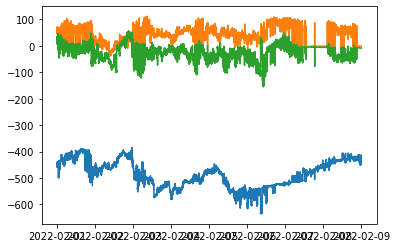

In [61]:
plt.plot(data['time'], data['vx'])
plt.plot(data['time'], data['vy'])
plt.plot(data['time'], data['vz'])

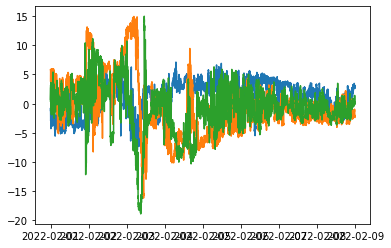

In [62]:
plt.plot(data['time'], data['bx'])
plt.plot(data['time'], data['by'])
plt.plot(data['time'], data['bz'])

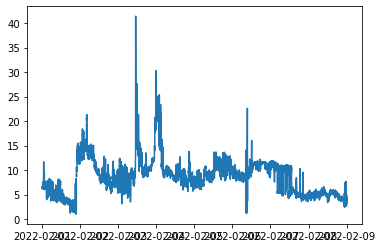

In [74]:
plt.plot(data['time'], data['rho'])

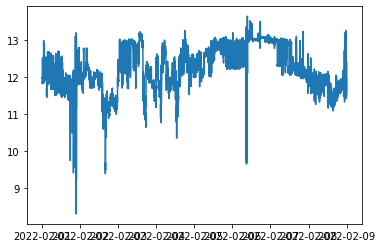

In [72]:
plt.plot(data['time'], data['temp'])

In [116]:
file = open('IMF_Starlink_2022.dat', 'w')

file.write('File created on {:} UT'.format(dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S") ))
file.write('\n2022 Starlink Space Weather Event - IMF mesurements by DSCOVR Satellite.\n')

file.write('\nyear mo dy hr min sec msec bx by bz vx vy vz dens temp\n#START')

a = pd.Series(data['bx'])
a.interpolate()

for i in range(len(data['time'])):
    txt = '\n {0:} 000{1:8.2f}{2:7.2f}{3:7.2f}{4:9.2f}\t{5:7.2f}\t{6:7.2f}\t{7:7.2f}\t{8:12.1f}'
    file.write(txt.format(data['time'][i].strftime("%Y %m %d %H %M %S"),
                          a[i], data['by'][i], data['bz'][i], 
                          data['vx'][i], data['vy'][i], data['vz'][i],
                          data['rho'][i], data['temp'][i]))

file.close()